# Imports

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# First impressions of the dataset 

In [136]:
df = pd.read_csv("/Users/emre/Documents/GitHub/shopify_questions/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [137]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [139]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [140]:
df.order_amount.quantile(.90)

531.0

# Version 1 

### Hypothesis 

The maximum value of `order_amount` and the 75% quantile have a big discrepancy. There may be some outliers in the dataset. Let's visualize the dataframe for outliers.

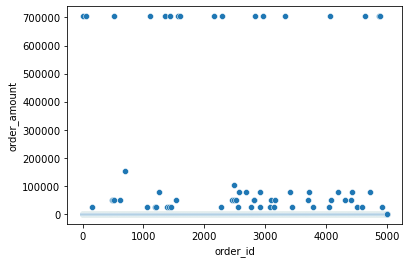

In [141]:
sns.scatterplot(data=df, x="order_id", y="order_amount")
plt.show()

Shows that the data set has some outliers bringing in $700000+ per order.
Instead of the average order value (AOV), the median value should be chosen.
The median attributes for outliers and gives a more adequate overview of the dataset.

In [142]:
order_value_median = df.order_amount.median()
order_value_median

284.0

The average median value is $284. Choosing the median is preferred for big outliers.

## Version 2

In [143]:
# Let's analyze the dataset a bit closer.
df.sort_values(by="order_amount", ascending=False).head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


In [144]:
# It seems that one shop (`user_id` = 607) has significantly higher `order_amount` than most of the other stores.

In [145]:
#Making sure that the outlier `order_amounts` are coming from one shop.
df.groupby("user_id").order_amount.describe().sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
user_id,,,,,,,,
607,17.0,704000.000000,0.000000,704000.0,704000.00,704000.0,704000.0,704000.0
878,11.0,14266.909091,46460.399857,94.0,215.00,266.0,326.0,154350.0
766,10.0,8007.600000,24303.270613,128.0,257.50,350.0,439.5,77175.0
834,18.0,6019.000000,24178.588557,127.0,245.00,333.0,381.5,102900.0
915,14.0,5785.142857,20547.778689,112.0,179.75,328.0,417.0,77175.0
...,...,...,...,...,...,...,...,...
892,13.0,227.307692,101.185790,134.0,149.00,163.0,306.0,459.0
899,15.0,226.666667,124.445437,111.0,147.00,188.0,263.0,531.0
827,14.0,226.500000,107.240743,130.0,149.50,177.0,304.0,464.0


In [146]:
# One shop

In [147]:
# Let's create a dataframe where `user_id = 607` is excluded and calculate the AOV from that data
df_no_outliers = df[df.user_id != 607]
df_no_outliers.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


<AxesSubplot:xlabel='order_id', ylabel='order_amount'>

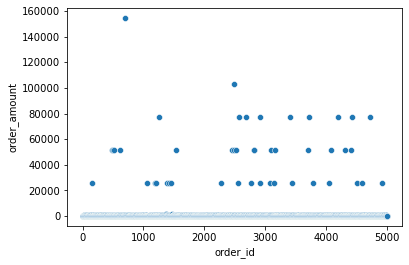

In [148]:
sns.scatterplot(data=df_no_outliers, x="order_id", y="order_amount")

In [110]:
df_no_outliers.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.00000
mean,2501.060405,50.106362,849.918322,754.091913,1.99398
std,1443.090253,29.051718,86.800308,5314.092293,0.98318
min,1.000000,1.000000,700.000000,90.000000,1.00000
25%,1250.500000,24.000000,776.000000,163.000000,1.00000
50%,2502.000000,50.000000,850.000000,284.000000,2.00000
75%,3750.500000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,154350.000000,8.00000


In [111]:
# As predicted, the AOV (mean) went down from $3145.13 to $754.
# Given the fact that there as still some outliers the median is still the better metric to use.